# 1. Install Dependencies and Setup

In [45]:
!pip install tensorflow

In [46]:
!pip install opencv-python 
!pip install matplotlib

In [47]:
!pip list 

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [48]:
import tensorflow as tf
import os

In [49]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [50]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [51]:
data_dir = 'data' 

In [52]:
os.listdir(os.path.join(data_dir,'real'))

['real_00001.jpg',
 'real_00003.jpg',
 'real_00004.jpg',
 'real_00005.jpg',
 'real_00006.jpg',
 'real_00007.jpg',
 'real_00008.jpg',
 'real_00009.jpg',
 'real_00011.jpg',
 'real_00013.jpg',
 'real_00014.jpg',
 'real_00019.jpg',
 'real_00020.jpg',
 'real_00022.jpg',
 'real_00028.jpg',
 'real_00029.jpg',
 'real_00030.jpg',
 'real_00034.jpg',
 'real_00037.jpg',
 'real_00039.jpg',
 'real_00041.jpg',
 'real_00042.jpg',
 'real_00043.jpg',
 'real_00047.jpg',
 'real_00048.jpg',
 'real_00049.jpg',
 'real_00051.jpg',
 'real_00052.jpg',
 'real_00055.jpg',
 'real_00057.jpg',
 'real_00061.jpg',
 'real_00063.jpg',
 'real_00068.jpg',
 'real_00070.jpg',
 'real_00073.jpg',
 'real_00075.jpg',
 'real_00077.jpg',
 'real_00078.jpg',
 'real_00079.jpg',
 'real_00080.jpg',
 'real_00083.jpg',
 'real_00084.jpg',
 'real_00086.jpg',
 'real_00087.jpg',
 'real_00103.jpg',
 'real_00104.jpg',
 'real_00105.jpg',
 'real_00107.jpg',
 'real_00109.jpg',
 'real_00110.jpg',
 'real_00112.jpg',
 'real_00120.jpg',
 'real_00121

In [53]:
for image_class in os.listdir(data_dir):
    print(image_class) 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)
    

fake
easy_100_1111.jpg
easy_101_0010.jpg
easy_102_0101.jpg
easy_103_1111.jpg
easy_104_1000.jpg
easy_105_1100.jpg
easy_106_0011.jpg
easy_107_1011.jpg
easy_108_1111.jpg
easy_10_0001.jpg
easy_112_1001.jpg
easy_114_1110.jpg
easy_116_111.jpg
easy_118_1111.jpg
easy_119_0011.jpg
easy_121_0011.jpg
easy_122_1011.jpg
easy_123_0100.jpg
easy_125_0011.jpg
easy_126_0111.jpg
easy_127_0001.jpg
easy_129_1111.jpg
easy_130_1101.jpg
easy_131_1001.jpg
easy_132_0110.jpg
easy_133_1100.jpg
easy_134_0001.jpg
easy_135_0011.jpg
easy_137_0001.jpg
easy_138_0101.jpg
easy_139_0110.jpg
easy_13_1010.jpg
easy_143_0011.jpg
easy_145_1000.jpg
easy_148_0011.jpg
easy_149_1001.jpg
easy_14_1111.jpg
easy_150_0011.jpg
easy_151_1110.jpg
easy_152_0011.jpg
easy_153_1110.jpg
easy_154_1100.jpg
easy_155_0011.jpg
easy_156_0010.jpg
easy_158_0011.jpg
easy_159_1111.jpg
easy_160_0011.jpg
easy_161_1101.jpg
easy_162_0001.jpg
easy_163_1001.jpg
easy_165_1010.jpg
easy_166_1100.jpg
easy_167_0110.jpg
easy_168_0010.jpg
easy_171_1100.jpg
easy_173_

In [54]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [55]:
img = cv2.imread(os.path.join('data','real', 'real_00001.jpg'))

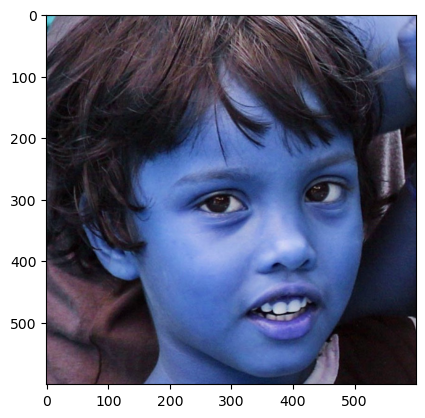

In [56]:
# type(img)     # Img datatype
# img.shape     # Image dimension
plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [57]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [58]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
tf.keras.utils.image_dataset_from_directory??


In [60]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 960 files belonging to 2 classes.


In [61]:
data_iterator = data.as_numpy_iterator()

In [62]:
# data_iterator

In [63]:
# Run again to get another batch from the iterator
batch = data_iterator.next()

In [64]:
# Image representation as numpy arrays
# batch[0].shape
# 1 = realimages
# 0 =  fake images
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

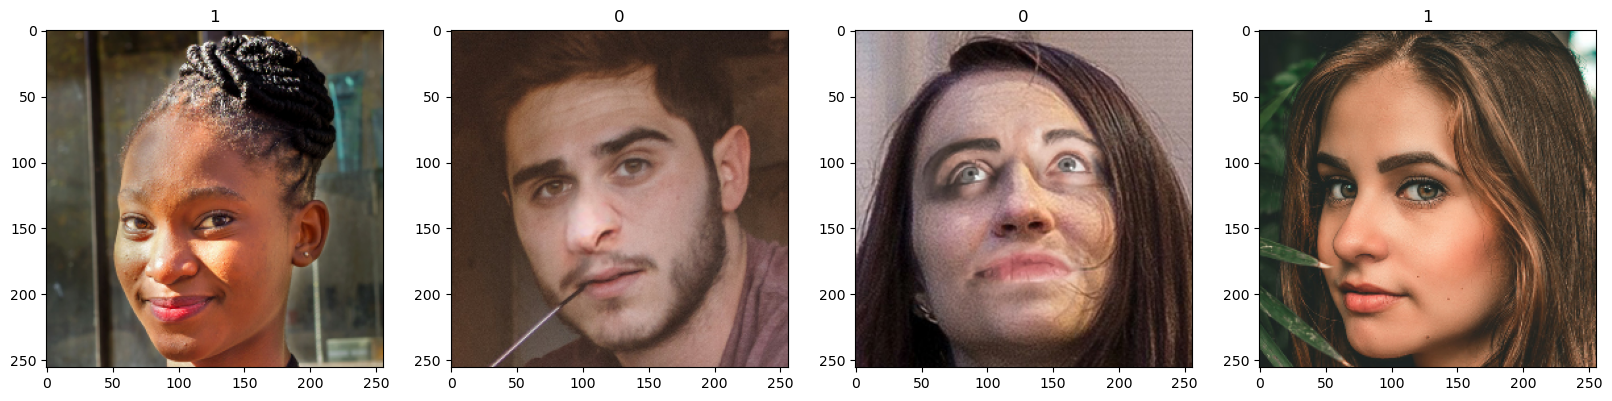

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Step2: Data Pre-processing

# 4. Scale Data

In [66]:
data = data.map(lambda x,y: (x/255, y))

In [67]:
# scaled_iterator = data.as_numpy_iterator()
data.as_numpy_iterator().next()

(array([[[[0.09554803, 0.15179802, 0.18053576],
          [0.07338676, 0.14013577, 0.16754557],
          [0.10589384, 0.17256051, 0.20001149],
          ...,
          [0.08483743, 0.12515606, 0.13722713],
          [0.05224801, 0.11487056, 0.11493183],
          [0.03052907, 0.10111731, 0.11680358]],
 
         [[0.0758789 , 0.13470243, 0.16215342],
          [0.09454657, 0.16905637, 0.19258578],
          [0.0892626 , 0.16095378, 0.1858925 ],
          ...,
          [0.04614928, 0.08646791, 0.09853899],
          [0.03265261, 0.09527516, 0.09533644],
          [0.03672641, 0.10731465, 0.12300092]],
 
         [[0.11241575, 0.17650889, 0.20395987],
          [0.08061045, 0.15512025, 0.17864966],
          [0.0948405 , 0.1693503 , 0.1928797 ],
          ...,
          [0.08225528, 0.12257391, 0.13464499],
          [0.04702436, 0.10964691, 0.10970818],
          [0.06999177, 0.14058   , 0.15626627]],
 
         ...,
 
         [[0.17214307, 0.11852788, 0.08323376],
          [0.20017

In [68]:
# batch = scaled_iterator.next()

In [69]:
# batch[1]

In [70]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [71]:
len(data)

30

In [72]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [73]:
train_size+test_size+val_size

30

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Step3: Deep Model

# 6. Build Deep Learning Model

In [75]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [77]:
model = Sequential()

In [78]:
# MaxPooling2D??

In [79]:
# 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [80]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [82]:
logdir='logs'

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [84]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 [==============================] - 9s 333ms/step - loss: 0.7554 - accuracy: 0.5074 - val_loss: 0.6896 - val_accuracy: 0.5833
Epoch 2/20
21/21 [==============================] - 7s 300ms/step - loss: 0.6892 - accuracy: 0.5417 - val_loss: 0.6865 - val_accuracy: 0.5156
Epoch 3/20
21/21 [==============================] - 7s 303ms/step - loss: 0.6717 - accuracy: 0.6057 - val_loss: 0.6476 - val_accuracy: 0.6719
Epoch 4/20
21/21 [==============================] - 7s 306ms/step - loss: 0.6577 - accuracy: 0.6190 - val_loss: 0.6759 - val_accuracy: 0.5938
Epoch 5/20
21/21 [==============================] - 7s 312ms/step - loss: 0.6632 - accuracy: 0.6146 - val_loss: 0.6587 - val_accuracy: 0.6875
Epoch 6/20
21/21 [==============================] - 8s 333ms/step - loss: 0.6502 - accuracy: 0.6414 - val_loss: 0.6547 - val_accuracy: 0.6146
Epoch 7/20
21/21 [==============================] - 7s 315ms/step - loss: 0.5881 - accuracy: 0.6726 - val_loss: 0.7339 - val_accuracy: 0.5365
Epoch 

In [85]:
hist.history

{'loss': [0.7554317712783813,
  0.689206600189209,
  0.6716859936714172,
  0.6577380299568176,
  0.663192093372345,
  0.650161862373352,
  0.588067889213562,
  0.5950416326522827,
  0.521245539188385,
  0.4885922968387604,
  0.4364563524723053,
  0.3754127621650696,
  0.30030399560928345,
  0.22372543811798096,
  0.1589764803647995,
  0.13300970196723938,
  0.11444549262523651,
  0.0855177715420723,
  0.07527658343315125,
  0.04628068953752518],
 'accuracy': [0.507440447807312,
  0.5416666865348816,
  0.605654776096344,
  0.6190476417541504,
  0.6145833134651184,
  0.6413690447807312,
  0.6726190447807312,
  0.6845238208770752,
  0.7232142686843872,
  0.7544642686843872,
  0.7991071343421936,
  0.84375,
  0.8854166865348816,
  0.9241071343421936,
  0.9389880895614624,
  0.9553571343421936,
  0.9776785969734192,
  0.9702380895614624,
  0.976190447807312,
  0.988095223903656],
 'val_loss': [0.6895516514778137,
  0.6865243315696716,
  0.6476144194602966,
  0.6759284138679504,
  0.65868860

# 8. Plot Performance

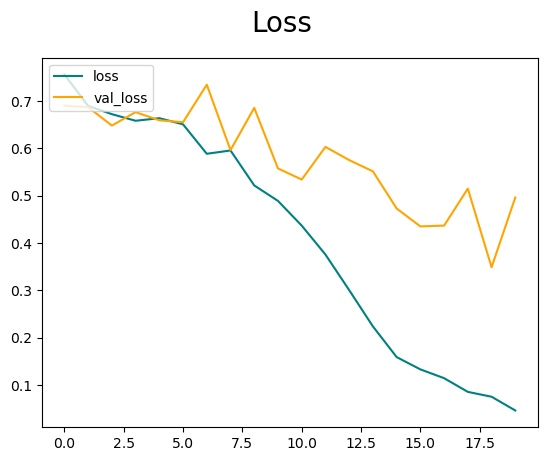

In [86]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

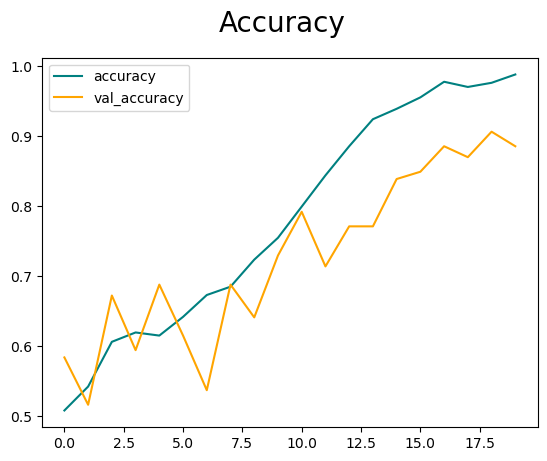

In [87]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [88]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [89]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [90]:
len(test)

3

In [91]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 94ms/step


In [92]:
print(f'{pre.result().numpy()}, {re.result().numpy()}, {acc.result().numpy()}')

0.9245283007621765, 0.9074074029922485, 0.90625


# 10. Test

In [93]:
import cv2

In [94]:
img = cv2.imread('easy.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

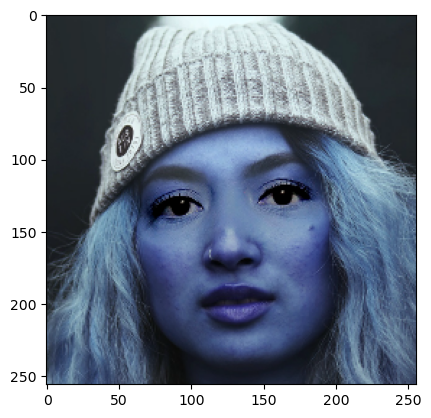

In [95]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
# resize
resize.shape

TensorShape([256, 256, 3])

In [97]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [98]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 170ms/step


In [99]:
print(yhat)
if yhat > 0.5:
    print(f'Predicted is real')
else:
    print(f'Predicted is fake')

[[0.00542034]]
Predicted is fake


1/1 [==============================] - 0s 26ms/step


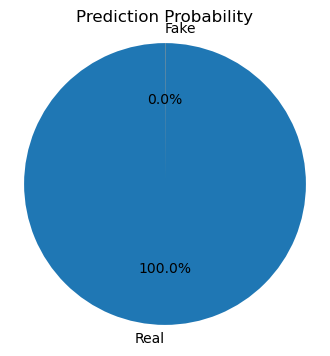

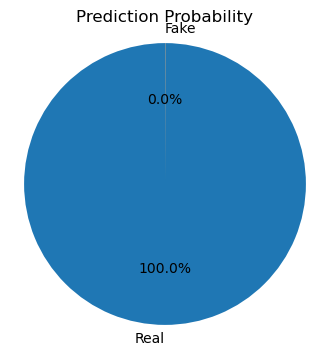

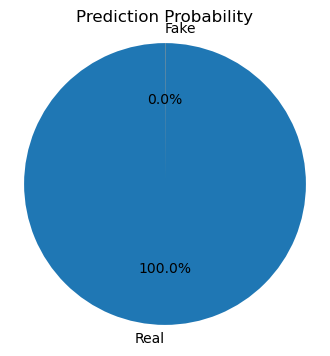

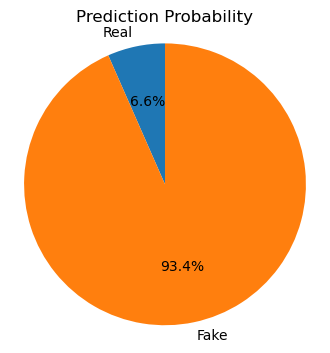

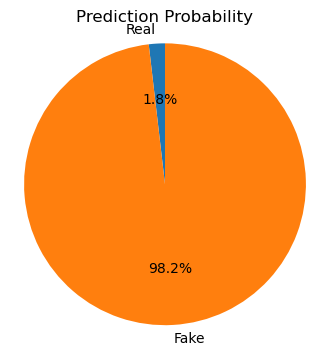

In [100]:
import cv2
import numpy as np
import tensorflow as tf
import shutil
import os
import matplotlib.pyplot as plt  # Import matplotlib
from tkinter import *
# from tkinter import ttk
from tkinter import filedialog


# Define your model here if not already done.
# Define the labels for your pie chart
labels = ['Real', 'Fake']

# Create an instance of Tkinter frame
win = Tk()

# Set the geometry of Tkinter frame
win.geometry("750x400")  # Increased height to accommodate the pie chart
absolute_path =""
def open_image():
    global absolute_path  # Declare absolute_path as a global variable
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png *.jpg *.jpeg *.gif *.bmp")])
    if file_path:
        # Define the destination folder where the image will be saved
        destination_folder = "image_folder"
        os.makedirs(destination_folder, exist_ok=True)
        
        # Extract the file name from the full path
        file_name = file_path.split("/")[-1]

        # Build the destination path
        destination_path = os.path.join(destination_folder, file_name)

        # Copy the image to the destination folder
        shutil.copy(file_path, destination_path)

        # Get the absolute path of the saved image
        absolute_path = os.path.abspath(destination_path)

        label1.config(text=f"Image Saved at: {absolute_path}")

        


def display_text():

        img = cv2.imread(absolute_path)

        if img is not None:
            resize = cv2.resize(img, (256, 256))  # Use cv2.resize for image resizing
            yhat = model.predict(np.expand_dims(resize / 255, 0))

            if yhat > 0.5:
                label.configure(text='Predicted class is Real')
            else:
                label.configure(text='Predicted class is Fake')

            # Create and display the pie chart
            pie_chart(yhat)

        else:
            label.configure(text='Failed to read the image. Check the file path.')



def pie_chart(yhat):
    # Ensure yhat is a 1D array
    yhat = yhat.ravel()

    # Create a pie chart based on yhat
    plt.figure(figsize=(4, 4))
    plt.pie([yhat[0], 1 - yhat[0]], labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Prediction Probability')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Save the pie chart to an image file (temporary)
    plt.savefig('pie_chart.png')

    # Display the pie chart in Tkinter using a PhotoImage
    pie_image = PhotoImage(file='pie_chart.png')

    # Clear the canvas and re-draw the pie chart at the desired location
    pie_canvas.delete("all")
    pie_canvas.create_image(170, 175, image=pie_image )  # Adjust the (x, y) coordinates as needed
    pie_canvas.image = pie_image

# Label
label = Label(win, text="", font=("Courier 22 bold"))
label.pack()

label1 = Label(win, text="", padx=10, pady=10)
label1.pack()


# Create an Entry widget to accept User Input
open_button = Button(win, text="Click To Open Image", command=open_image)
open_button.pack()

# Create a Button to validate Entry Widget
Button(win, text="Okay", width=20, command=display_text).pack(pady=20)

# Create a canvas to display the pie chart
pie_canvas = Canvas(win, width=350, height=350,  highlightthickness=0)
pie_canvas.pack()

# Create a label to display the pie chart
pie_label = Label(win)
pie_label.pack()

win.mainloop()
